## Background of project
Cardiovascular diseases (CVDs) are the number one cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of five CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

The main aim of this task will be be explore the data and identify the means to generate or select enhanced feature for onward training of the machine learning model


##Pipeline
- Import data
- Exploratory Data Analyses (EDA) on imported dataset
- 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif as MIC


In [5]:
heart_df = pd.read_csv('data/heart.csv')
heart_df.shape

(918, 12)

The imported dataset is made up of 918 records/samples and 12 columns/variables. 

In [3]:
#inspect the data
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


The 12 columns is made up of 11 possible feature columns ans 1 target column. For the purposes of this classification exercise, the target is HeartDisease

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot:>

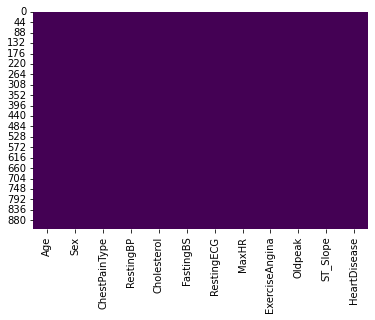

In [9]:
sns.heatmap(heart_df.isnull(),cbar=False,cmap='viridis')

The information above indicate that there are no missing data in the imported dataset. What this means is that, there is no need to undertake imputation on the data. 

## Asking Analytical Questions and Visualizations
This is the most important step in EDA. This step will decide how much can you think as an Analyst. This step varies from person to person in terms of their questioning ability. Try to ask questions related to independent variables and the target variable. For example – how age will affect the teart condition of an individual?

Before this let us check the correlation between different variables, this will give us a roadmap on how to proceed further.

<AxesSubplot:>

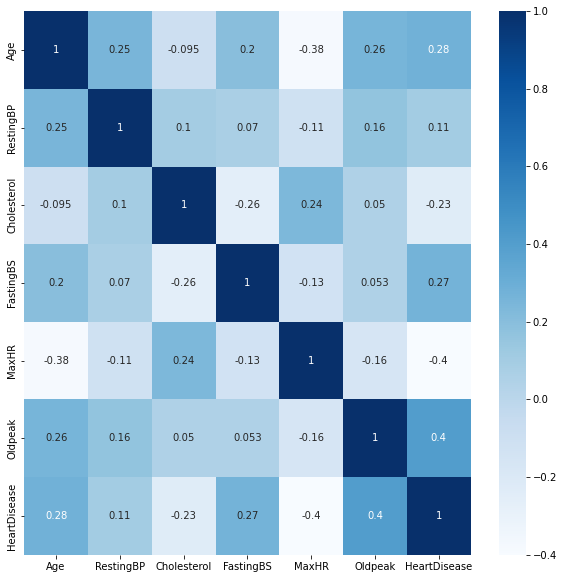

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_df.corr(), cbar=True, annot=True, cmap='Blues')

Positive Correlation
- HeartDisease – Oldpeak, Age*, FastingBS*


Negative Correlation
- HeartDisease – MaxHR, Cholesterol*


This heatmap has given us great insights into the data.


Now let us apply domain knowledge and ask the questions which will affect the condition of the heart.

## How does Oldpeak affect HeartDisease

<AxesSubplot:xlabel='Oldpeak', ylabel='HeartDisease'>

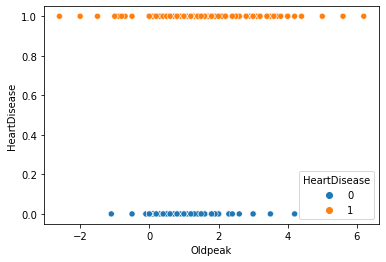

In [161]:
sns.scatterplot(data=heart_df, x='Oldpeak', y='HeartDisease', hue='HeartDisease')

<AxesSubplot:xlabel='Oldpeak', ylabel='Count'>

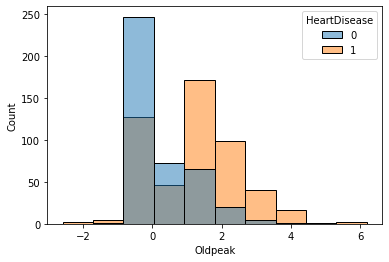

In [154]:
sns.histplot(data=heart_df, x='Oldpeak', hue='HeartDisease', bins=10)

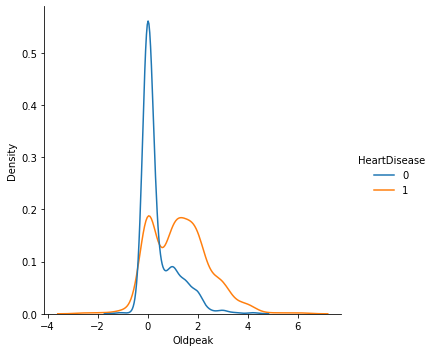

In [155]:
sns.displot(data=heart_df, x='Oldpeak', kind='kde', hue='HeartDisease')

<AxesSubplot:xlabel='HeartDisease', ylabel='Oldpeak'>

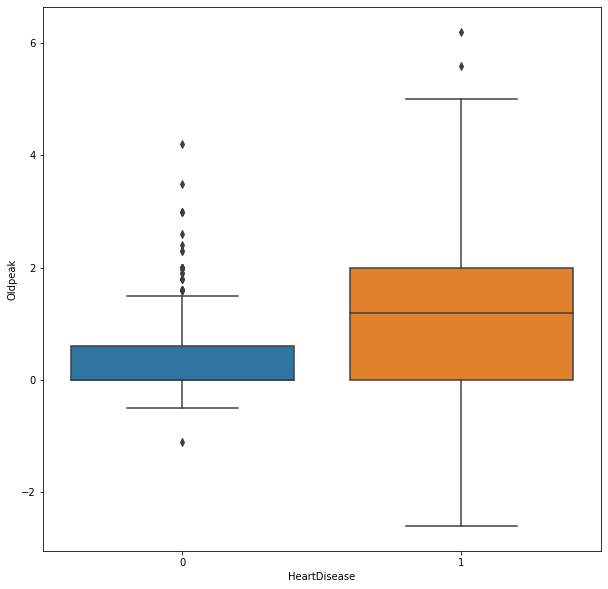

In [162]:
plt.figure(figsize=(10,10))
sns.boxplot(data=heart_df, x='HeartDisease', y='Oldpeak')

In [158]:
heart_df.groupby('HeartDisease').Oldpeak.describe()

,count,mean,std,min,25%,50%,75%,max
HeartDisease,,,,,,,,
0,410.0,0.408049,0.699709,-1.1,0.0,0.0,0.6,4.2
1,508.0,1.274213,1.151872,-2.6,0.0,1.2,2.0,6.2


## How does MaxHR affect HeartDisease

<AxesSubplot:xlabel='MaxHR', ylabel='HeartDisease'>

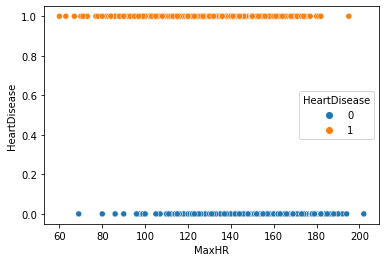

In [229]:
sns.scatterplot(x='MaxHR', y='HeartDisease', data=heart_df, hue='HeartDisease')

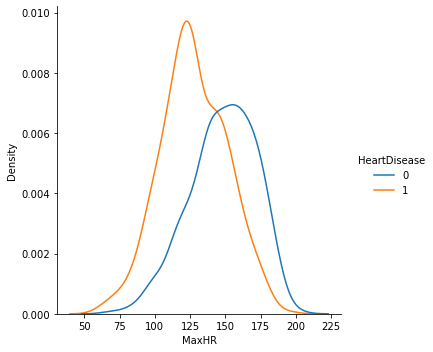

In [159]:
sns.displot(data=heart_df, x='MaxHR', kind='kde', hue='HeartDisease')

<AxesSubplot:xlabel='MaxHR', ylabel='Count'>

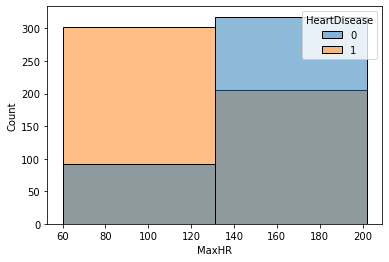

In [166]:
sns.histplot(data=heart_df, x='MaxHR', hue='HeartDisease', bins=2)

In [163]:
heart_df.groupby('HeartDisease').MaxHR.describe()

,count,mean,std,min,25%,50%,75%,max
HeartDisease,,,,,,,,
0,410.0,148.151220,23.288067,69.0,134.0,150.0,165.00,202.0
1,508.0,127.655512,23.386923,60.0,112.0,126.0,144.25,195.0


## Mutual Information Calculation

In [173]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

score_df = heart_df.select_dtypes(include=numerics)

In [198]:
y= score_df.HeartDisease
X = score_df.drop(['HeartDisease'], axis=1)
col = np.array(X.columns)
score = MIC(X,y)
mi_score = pd.DataFrame([score], columns=col)
print(mi_score)

        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak
0  0.045675   0.005447      0.08493   0.055772  0.092775  0.132125


In [196]:
mi_score

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,0.0616,0.033786,0.066251,0.016077,0.102363,0.141637


<AxesSubplot:>

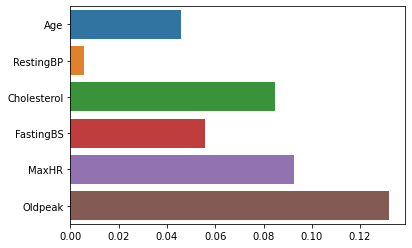

In [201]:
sns.barplot(data=mi_score,orient='horizontal')

From the mutual information plot, Cholesterol can also be added to the list of features 

In [224]:
import pandas as pd
from sklearn import preprocessing

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=col)
df = pd.concat([df,y], axis=1)

In [225]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0


In [226]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


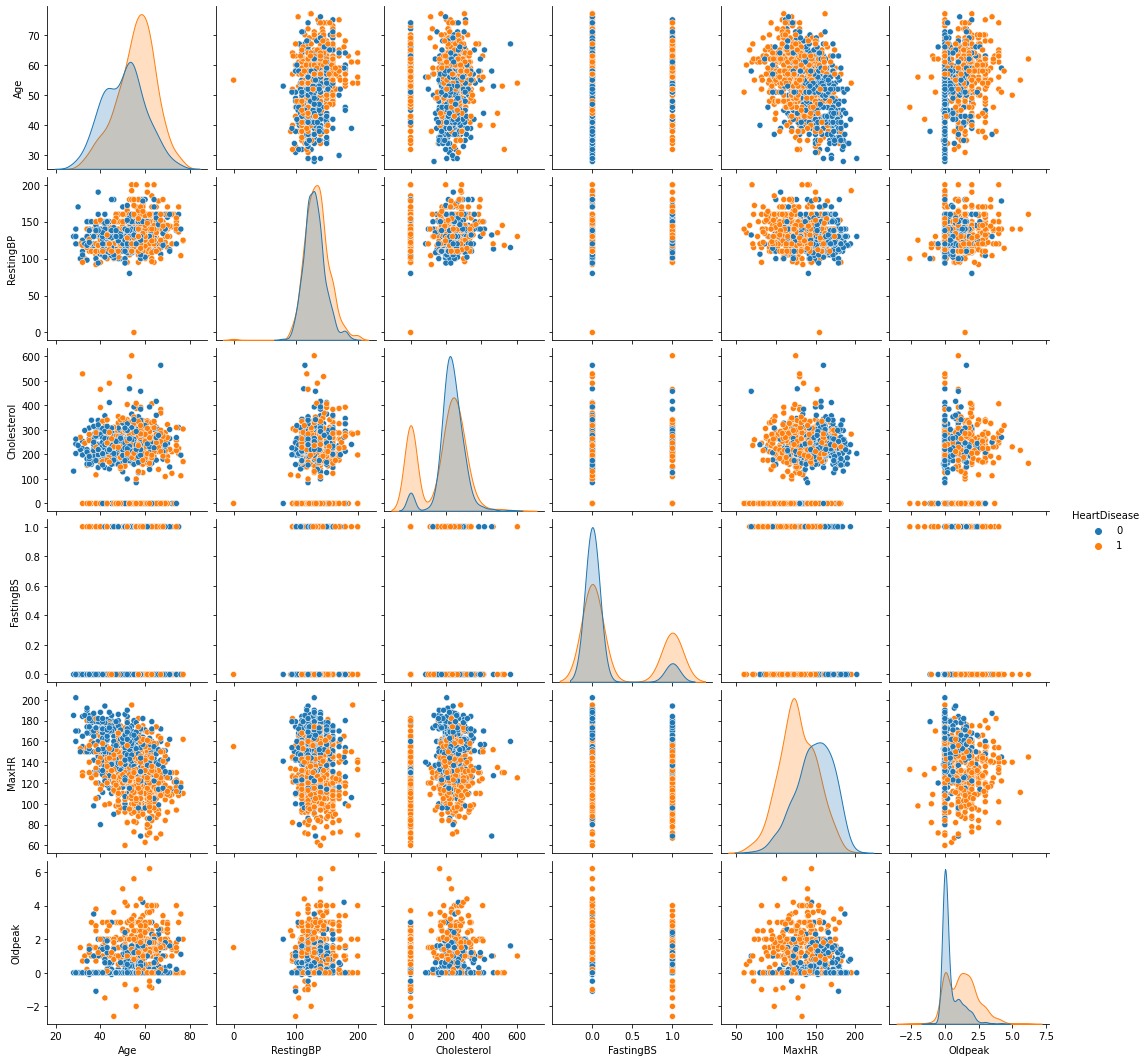

In [221]:
sns.pairplot(data=heart_df, hue='HeartDisease')

In [236]:
ppt = df[['Oldpeak', 'Cholesterol', 'MaxHR', 'HeartDisease']]

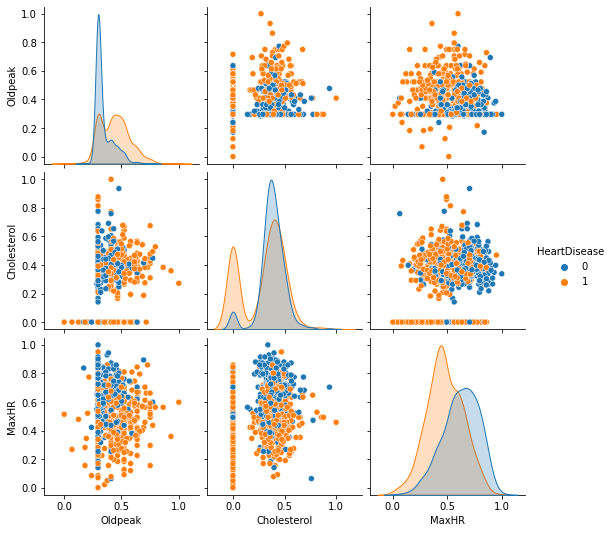

In [237]:
sns.pairplot(data=ppt, hue='HeartDisease')

In [239]:
cat_df = heart_df.select_dtypes(object)

In [240]:
cat_df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [243]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define data
data = cat_df
cat_col = cat_df.columns
#print(data)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
pd.DataFrame(result, columns=cat_col).head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1.0,1.0,1.0,0.0,2.0
1,0.0,2.0,1.0,0.0,1.0
2,1.0,1.0,2.0,0.0,2.0
3,0.0,0.0,1.0,1.0,1.0
4,1.0,2.0,1.0,0.0,2.0
